## Coordinate Descent Algorithm and BoKeh widget

In [1]:
from bokeh.io import output_notebook, show, push_notebook
output_notebook()

Loading BokehJS ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fv(a):
    return np.dot(a, np.array([[10, -3],[-3, 5]])).dot(a.T) # we are doing x.A.x'


def jv(a):
    return np.dot(np.array([[20, -6],[-6, 10]]),a).T

def minimize_cd(v, selector):
     tol = fv(v)
     while tol >= 1E-3:
            initial =fv(v)
            v = v-selector*jv(v)
            tol = initial-fv(v)
     else:
         return v, fv(v), tol
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(-5,5,N)
X,Y = np.meshgrid(x,y)
Z = np.apply_along_axis(func1d= fv,axis = 0, arr=[X.ravel(),Y.ravel()]).reshape(X.shape)

In [3]:
import numpy as np
from bokeh.plotting import figure 
from bokeh.layouts import gridplot
from bokeh.models import Arrow, NormalHead, ColumnDataSource
from bokeh.models.widgets import Panel, Tabs

s1 = ColumnDataSource(data=dict(x=[X], y=[Y], z = [Z]))
p1 = figure(x_range=(-5, 5), y_range=(-5, 5),
           tooltips=[("x", "$x"), ("y", "$y"), ("value", "@z")],plot_height=300)
p1.image(image='z', x=-5, y=-5, dw=10, dh=10, palette="Spectral11", source = s1)
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'y'


s2 = ColumnDataSource(data=dict(x = [], y = []))
path = p1.line(x = 'x' , y = 'y', source = s2, color = 'red',line_width = 2)

p2 = figure(plot_height=300)
p2.grid.grid_line_alpha=0.3
p2.xaxis.axis_label = 'Number of Iterations'
p2.yaxis.axis_label = 'F(x,y)'

s3 = ColumnDataSource(data=dict(myiter = [], f_xy = [], f_tol = []))
fxy = p2.line(x = 'myiter', y = 'f_xy', color='Navy', line_width = 2, source = s3)
tab1 = Panel(child=p2, title="F(x,y)")

p3 = figure(plot_height=300)
p3.grid.grid_line_alpha=0.3
p3.xaxis.axis_label = 'Number of Iterations'
p3.yaxis.axis_label = 'Tolerance'
tolxy = p3.line(x = 'myiter', y = 'f_tol', color='Navy', line_width = 2, source = s3)
tab2 = Panel(child=p3, title="Tolerance")
tabs = Tabs(tabs=[tab1, tab2])


def cd(start_x = -3,start_y=-1):
    v = np.array([start_x,start_y])
    alpha = 0.001
    f_tol = fv(v)
    myiter = 0
    print "Current Vector, f(Current vector), Tolerance"
    print v, fv(v), f_tol
    s2.data = dict(x = [], y = [])
    s3.data = dict(myiter = [], f_xy = [], f_tol = [])
    
    while f_tol >= 1E-3:
        for selector in np.diag(np.ones(v.size)):
            f_k = fv(v)
            s2.data['x'].append(v[0])
            s2.data['y'].append(v[1])
            s3.data['myiter'].append(myiter)
            s3.data['f_xy'].append(f_k)
            s3.data['f_tol'].append(f_tol)
            

            v, f_kp1, tol =  minimize_cd(v, selector*alpha)
            f_tol = f_k-f_kp1
            print v, f_k, f_tol
            path.update()
            fxy.update()
            tolxy.update()
        myiter+=1

    push_notebook()
    
        


In [4]:
show(gridplot([[p1,tabs]], plot_width=400, plot_height=400), notebook_handle = True)  

In [5]:
from ipywidgets import interact_manual,interact
interact(cd, start_x = (-5,5,0.1), start_y = (-5,5,0.1))

Current Vector, f(Current vector), Tolerance
[-3. -1.] 77.0 77.0
[-0.34845659 -1.        ] 77.0 72.8765195912
[-0.34845659 -0.30784307] 4.12348040881 3.0790433728
[-0.14121298 -0.30784307] 1.04443703601 0.632017829404
[-0.14121298 -0.18357856] 0.412419206606 0.200044759862
[-0.1039987  -0.18357856] 0.212374446744 0.0502632962075
[-0.1039987  -0.16151265] 0.162111150536 0.0243048095402
[-0.09765783 -0.16151265] 0.137806340996 0.00664199916142
[-0.09765783 -0.15745727] 0.131164341835 0.00409148118333
[-0.09566117 -0.15745727] 0.127072860651 0.0019735890401
[-0.09566117 -0.15645666] 0.125099271611 0.000996205609229


<function __main__.cd>

## Coordinate descent with Matplotlab

[x, y], f(x,y), Tolerance
[-3 -1] 77 77
[-0.31275039 -1.        ] 77 72.8983742757
[-0.31275039 -0.21554376] 4.10162572432 3.29567047104
[-0.07557412 -0.21554376] 0.805955253289 0.614282401147
[-0.07557412 -0.07372892] 0.191672852142 0.14081059837
[-0.03332909 -0.07372892] 0.0508622537726 0.0273181112756
[-0.03332909 -0.04855256] 0.023544142497 0.0103583798201
[-0.0265743  -0.04855256] 0.0131857626769 0.00207857666079
[-0.0265743  -0.04235704] 0.0111071860161 0.00182831048453
[-0.02380086 -0.04235704] 0.0092788755316 0.000692275664885
[-0.02380086 -0.03954939] 0.00858659986671 0.000748876704874


C:\Users\bjuluri.PIENERGY\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\bjuluri.PIENERGY\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


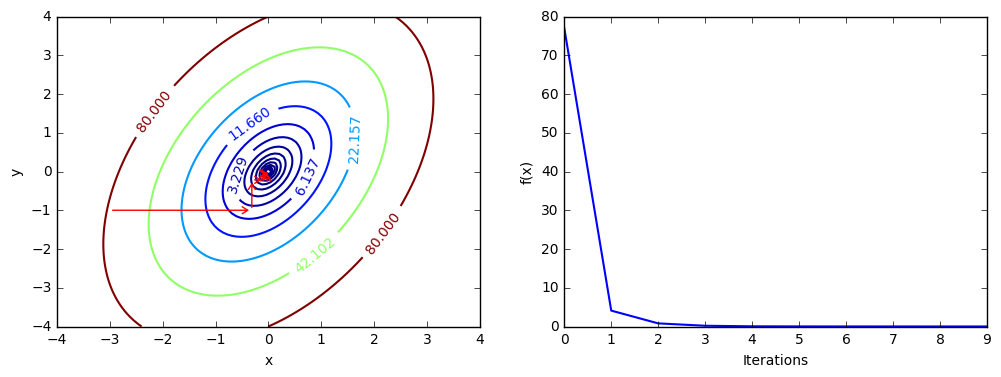

In [6]:
alpha = 0.01
a = np.array([-3,-1]) #np.random.uniform(low=0.5, high=4, size=(2,))
f_tol = fv(a)
coord = []
tol_holder = []
f_holder = []
print "[x, y], f(x,y), Tolerance"
print a, fv(a), f_tol
while f_tol >= 1E-3:
    for selector in np.diag(np.ones(a.size)):
        f_k = fv(a)
        coord.append(a)
        tol_holder.append(f_tol)
        f_holder.append(f_k)
        a,f_kp1,tol =  minimize_cd(a, selector*alpha)
        f_tol = f_k-f_kp1
        print a, f_k, f_tol
        
x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)
X,Y = np.meshgrid(x,y)
Z = np.apply_along_axis(func1d= fv,axis = 0, arr=[X.ravel(),Y.ravel()]).reshape(X.shape)

plt.suptitle('Coordinate descent')

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
CS = ax1.contour(X, Y, Z,np.logspace(np.log10(0.01),np.log10(80),15))
plt.clabel(CS, inline=1, fontsize=10)
ax1.set_xlabel('x')
ax1.set_ylabel('y')


for i,j in enumerate(coord[:-1]):
    ax1.annotate ('', coord[i+1], coord[i], arrowprops={'arrowstyle':'->, head_width=0.25', 'color':'r'})

ax2.plot(f_holder)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('f(x)')

plt.show()   

## Coordinate descent algorithm and matlab (not vectorized)

x,   y,    f(x,y),    tol 
0.572465289445 1 3.20379080143 9.25
0.25067859138 0.371309851927 0.445077227692 8.19743444236
0.133101108314 0.177263765731 0.104127716282 0.847871950135
0.0910297589971 0.107370177583 0.0404305719531 0.144218844984
0.0767791628267 0.0826526022523 0.025556476879 0.0300284928961
0.0704832583262 0.0727380389176 0.0205326761263 0.00802555328243
0.0676165263251 0.0696932305254 0.0188712201277 0.00276877174476
0.0648617276358 0.0667808990524 0.0173445140371 0.00158648356262
0.0622152256405 0.0639945128053 0.0159415615298 0.00145852209301
0.0596733815803 0.0613279750632 0.0146522790279 0.00134086765239
0.0572325782493 0.0587755804517 0.0134674163084 0.00123269050055
0.0548892390505 0.0563319771015 0.0123784848947 0.00113322823217
0.0526398431695 0.0539921337343 0.0113776932575 0.00104178003043


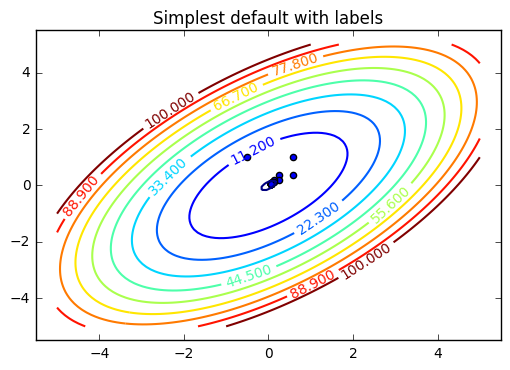

In [7]:
def jx(x,y):
    return 10*x-6*y

def jy(x,y):
    return -6*x+10*y
    
def f(x,y):
    return 5*x**2-6*x*y+5*y**2


def f(x,y):
    return 5*x**2-6*x*y+5*y**2

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.figure()
CS = plt.contour(X, Y, Z,np.linspace(0.1,100,10))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')



def minimize_x(x,y0,f,alpha = .01):
    tol = f(x,y0)
    while tol >= 1e-3:
        initial =f(x,y0) 
        
        x = x-alpha*jx(x,y0)
        tol = initial-f(x,y0)
    else:
        return x, y0, f(x,y0)

def minimize_y(x0,y,f,alpha = .01):
    tol = f(x0,y)
    while tol >= 1e-3:
        initial =f(x0,y) 
        y = y -alpha*jy(x0,y)
        tol = initial-f(x0,y)
    else:
        return x0, y, f(x0,y)


x = -0.5
y = 1 
plt.scatter(x,y)
z_tol = f(x,y)
print("x,   y,    f(x,y),    tol ")
while z_tol >=1E-3:
   
    initial = f(x,y)
    x,y,z =  minimize_x(x,y,f)
    print x, y, z, z_tol
    plt.scatter(x,y)
    x,y,z = minimize_y(x,y,f)
    plt.scatter(x,y)
    z_tol = abs(z-initial)

plt.show()